In [3]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir))))

In [4]:
# imports

import pandas as pd
import numpy as np
from src.core.data_ingesting import DataIngestFactory
from src.analysis.basic_data_inspection import DataTypesInspectionStrategy, DataSummaryInspectionStrategy
from src.analysis.inspection_decorator import Inspector
from src.analysis.missing_value_analysis import BasicMissingValueAnalyser

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)

In [30]:
#extract data
df = DataIngestFactory.get_data_ingest('.zip').ingest('../data/archive.zip','dating_app_behavior_dataset.csv')
df.head()

gender sexual_orientation location_type income_bracket  \
0  Prefer Not to Say                Gay         Urban           High   
1               Male           Bisexual      Suburban   Upper-Middle   
2         Non-binary          Pansexual      Suburban            Low   
3        Genderfluid                Gay         Metro       Very Low   
4               Male           Bisexual         Urban         Middle   

       education_level                  interest_tags  app_usage_time_min  \
0           Bachelor’s   Fitness, Politics, Traveling                  52   
1  No Formal Education  Languages, Fashion, Parenting                 279   
2             Master’s           Movies, Reading, DIY                  49   
3              Postdoc      Coding, Podcasts, History                 185   
4           Bachelor’s       Clubbing, Podcasts, Cars                  83   

  app_usage_time_label  swipe_right_ratio swipe_right_label  likes_received  \
0             Moderate               0.60        Optimistic             173   
1         Extreme User               0.56        Optimistic             107   
2             Moderate               0.41        Optimistic              91   
3         Extreme User               0.32          Balanced             147   
4                 High               0.32          Balanced              94   

   mutual_matches  profile_pics_count  bio_length  message_sent_count  \
0              23                   4          44                  75   
1               7                   3         301                  35   
2              27                   2         309                  33   
3               6                   5          35                   5   
4              11                   1         343                  34   

   emoji_usage_rate  last_active_hour swipe_time_of_day   match_outcome  
0              0.36                13     Early Morning    Mutual Match  
1              0.42                 0           Morning    Chat Ignored  
2              0.41                 1    After Midnight   Date Happened  
3              0.07                21           Morning       No Action  
4              0.11                22    After Midnight  One-sided Like

In [32]:
df = df[['gender','sexual_orientation','likes_received','mutual_matches','message_sent_count','last_active_hour']]
df.head()

gender sexual_orientation  likes_received  mutual_matches  \
0  Prefer Not to Say                Gay             173              23   
1               Male           Bisexual             107               7   
2         Non-binary          Pansexual              91              27   
3        Genderfluid                Gay             147               6   
4               Male           Bisexual              94              11   

   message_sent_count  last_active_hour  
0                  75                13  
1                  35                 0  
2                  33                 1  
3                   5                21  
4                  34                22

In [23]:
inspector = Inspector(df)
inspector.add_strategy(DataTypesInspectionStrategy()).add_strategy(DataSummaryInspectionStrategy()).execute()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              50000 non-null  object
 1   sexual_orientation  50000 non-null  object
 2   likes_received      50000 non-null  int64 
 3   mutual_matches      50000 non-null  int64 
 4   message_sent_count  50000 non-null  int64 
 5   last_active_hour    50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.3+ MB
None
Neumerical Information
       likes_received  mutual_matches  message_sent_count  last_active_hour
count    50000.000000    50000.000000         50000.00000      50000.000000
mean        99.526040       13.870280            50.07194         11.521800
std         57.996799        9.105615            29.16800          6.920474
min          0.000000        0.000000             0.00000          0.000000
25%         49.000000        6.000000            2

Basic Missing Values Identified
Series([], dtype: int64)


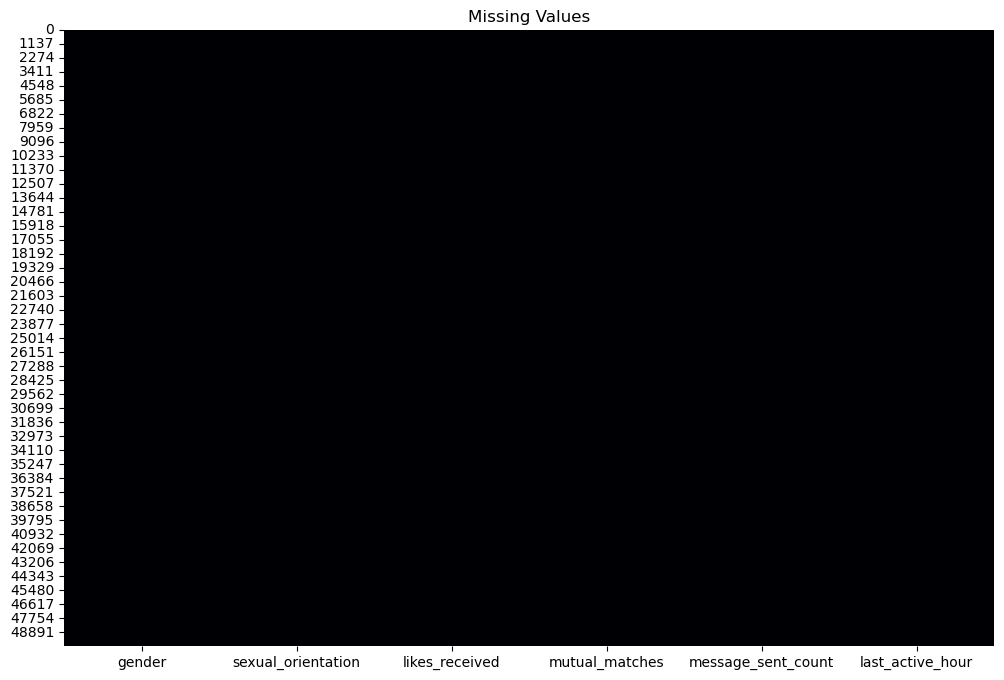

In [24]:
analyzer = BasicMissingValueAnalyser()
analyzer.analyse(df)

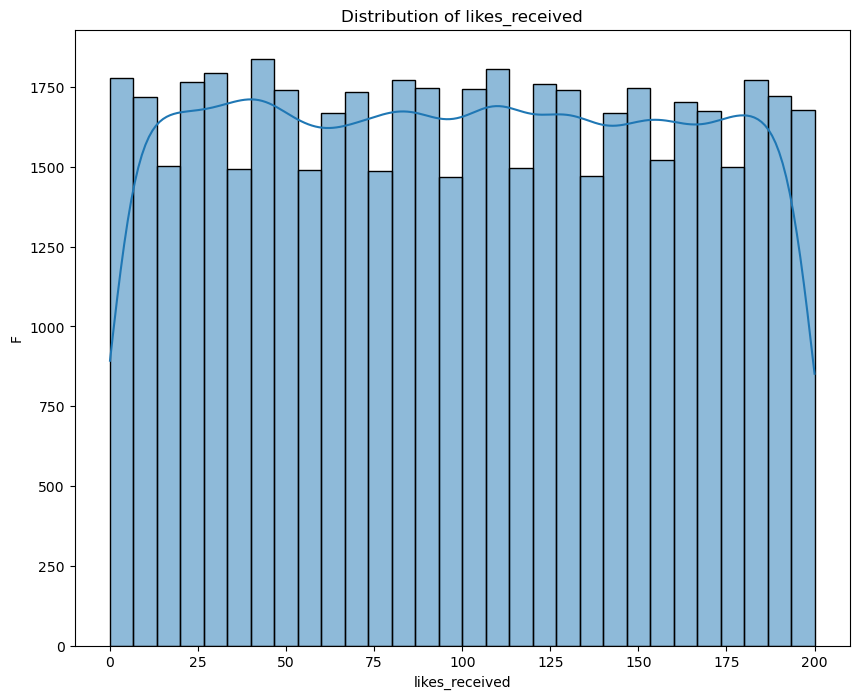

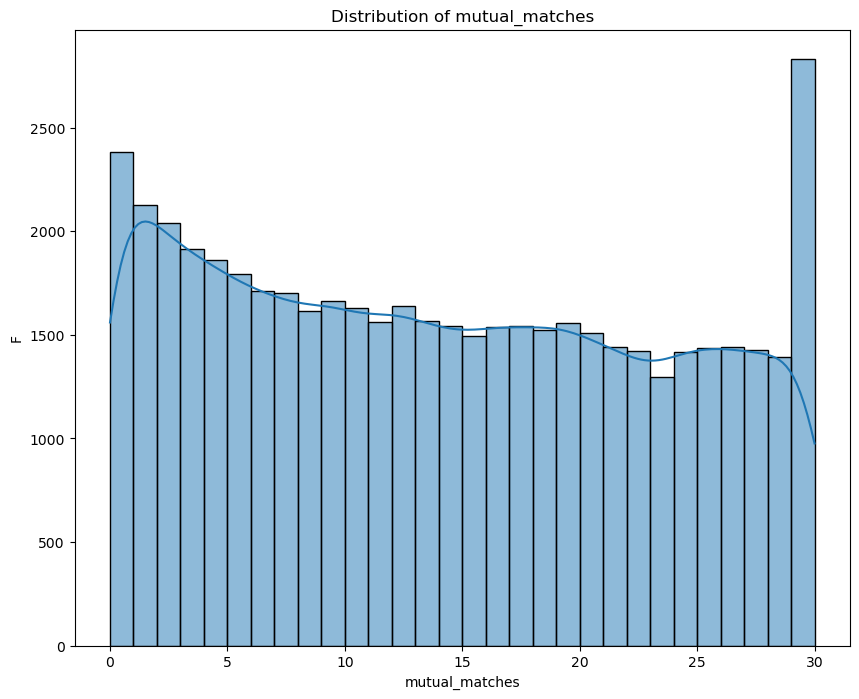

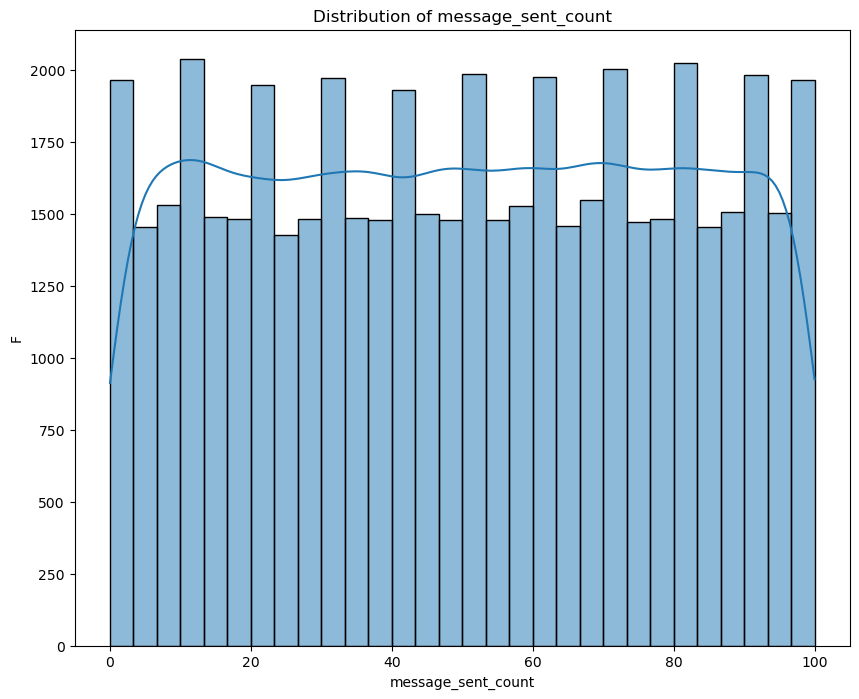

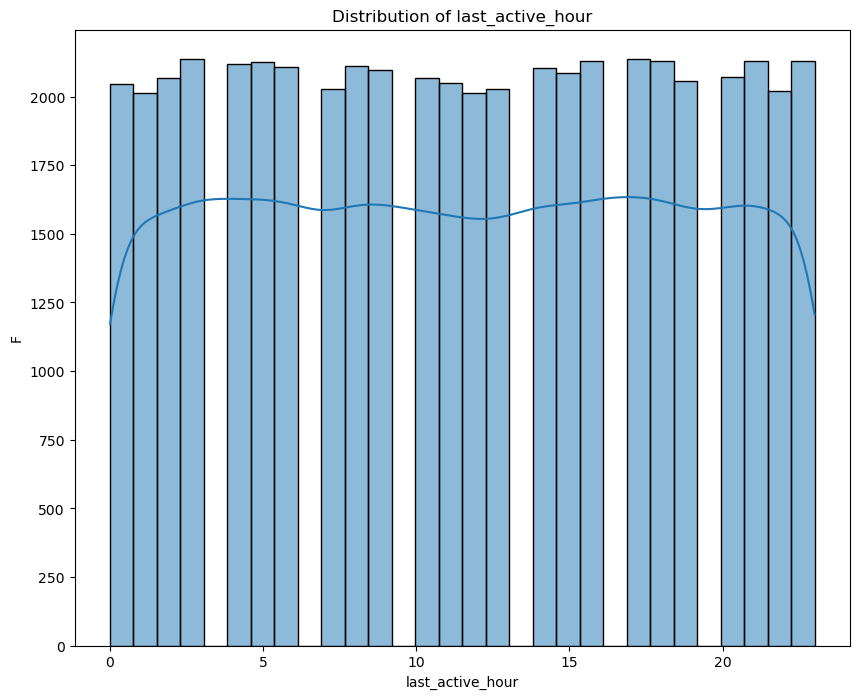

In [27]:
from src.analysis.varient_analysis import NumericalUnivarientAnalyzer

nva = NumericalUnivarientAnalyzer('likes_received')
nva.analyse(df)
nva = NumericalUnivarientAnalyzer('mutual_matches')
nva.analyse(df)
nva = NumericalUnivarientAnalyzer('message_sent_count')
nva.analyse(df)
nva = NumericalUnivarientAnalyzer('last_active_hour')
nva.analyse(df)

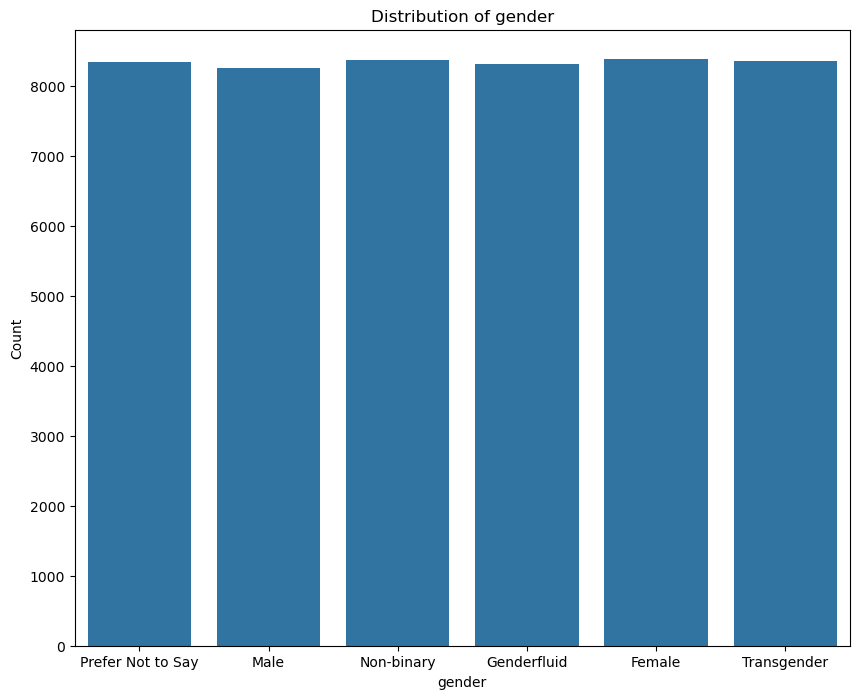

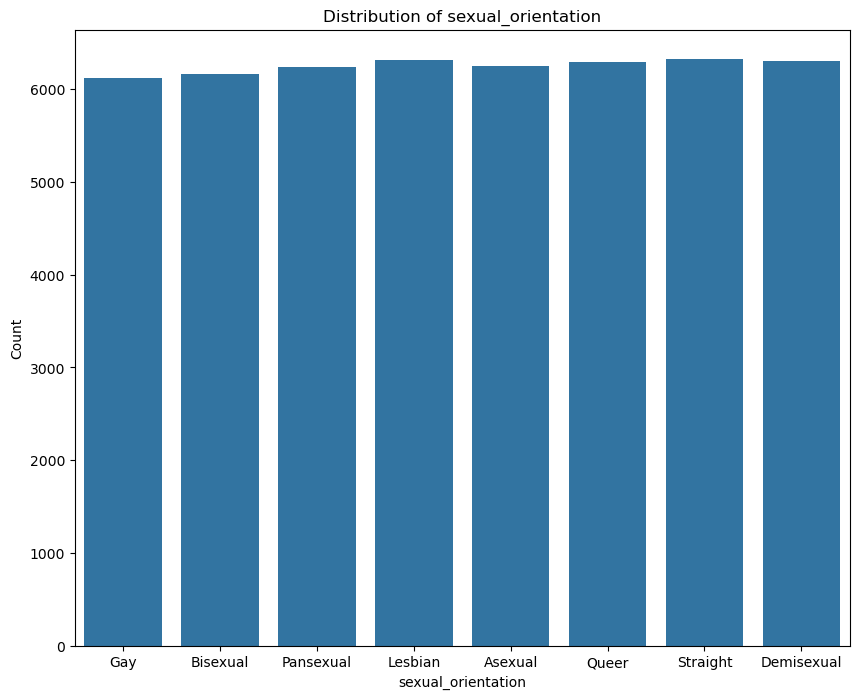

In [28]:
from src.analysis.varient_analysis import CategoricalUnivarientAnalyzer

nva = CategoricalUnivarientAnalyzer('gender')
nva.analyse(df)
nva = CategoricalUnivarientAnalyzer('sexual_orientation')
nva.analyse(df)

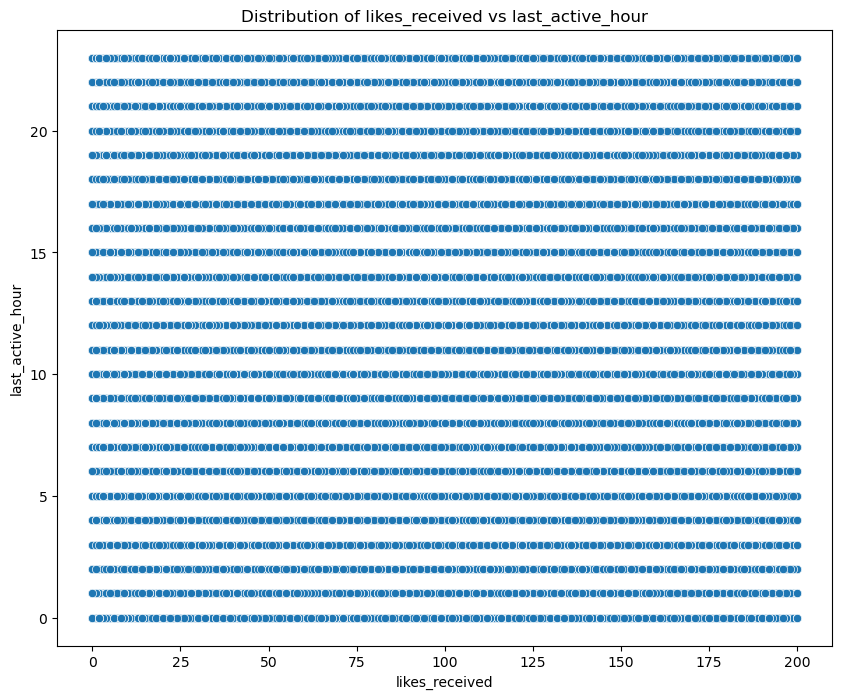

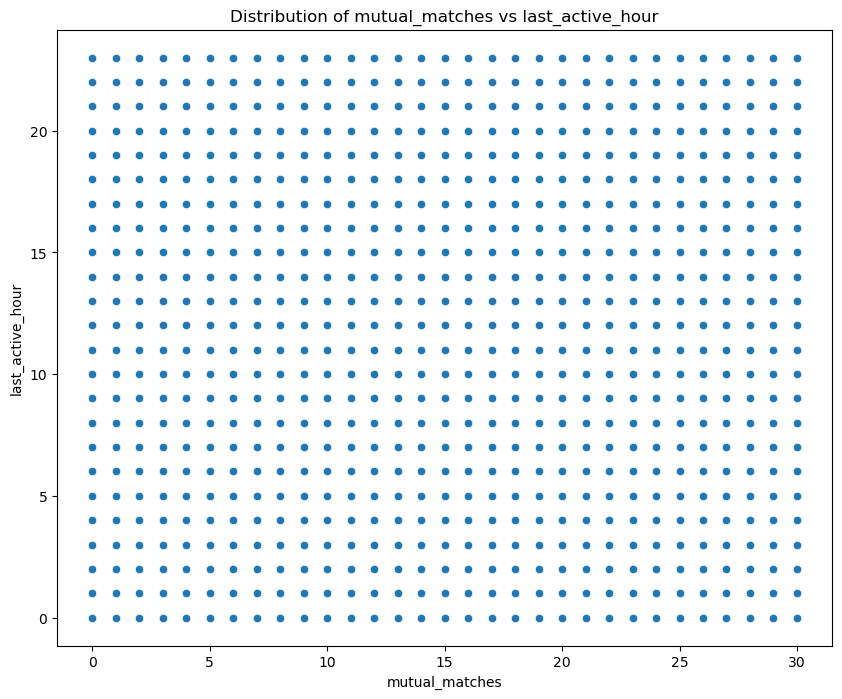

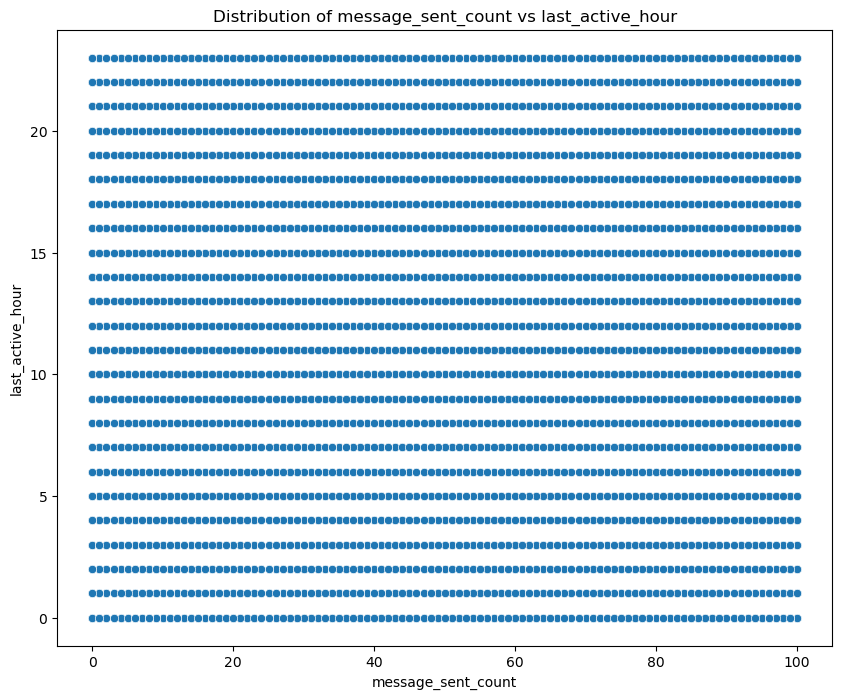

In [33]:
from src.analysis.varient_analysis import NumericalBiVarientAnalysis

nbva = NumericalBiVarientAnalysis('likes_received', 'last_active_hour')
nbva.analyse(df)
nbva = NumericalBiVarientAnalysis('mutual_matches', 'last_active_hour')
nbva.analyse(df)
nbva = NumericalBiVarientAnalysis('message_sent_count', 'last_active_hour')
nbva.analyse(df)

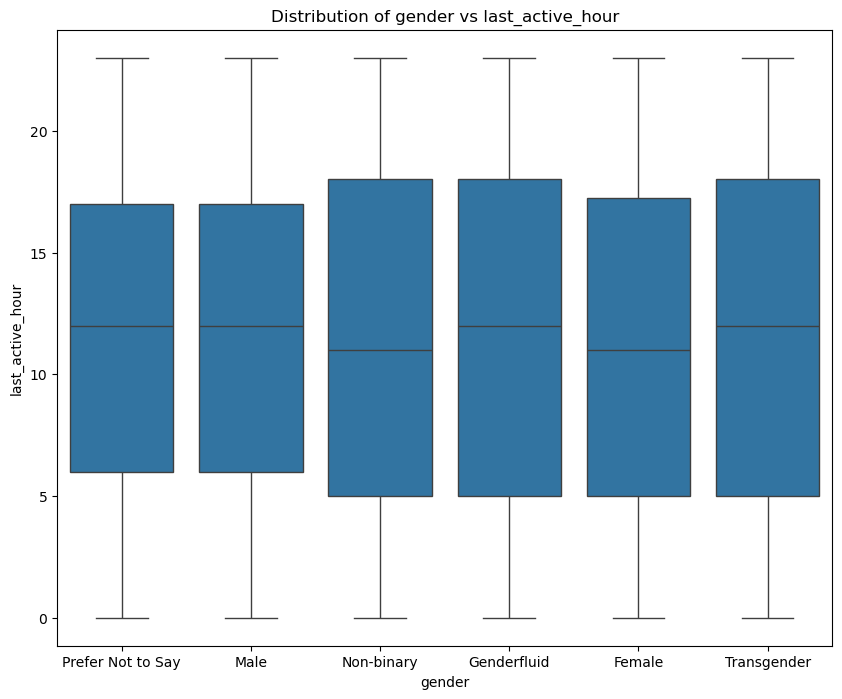

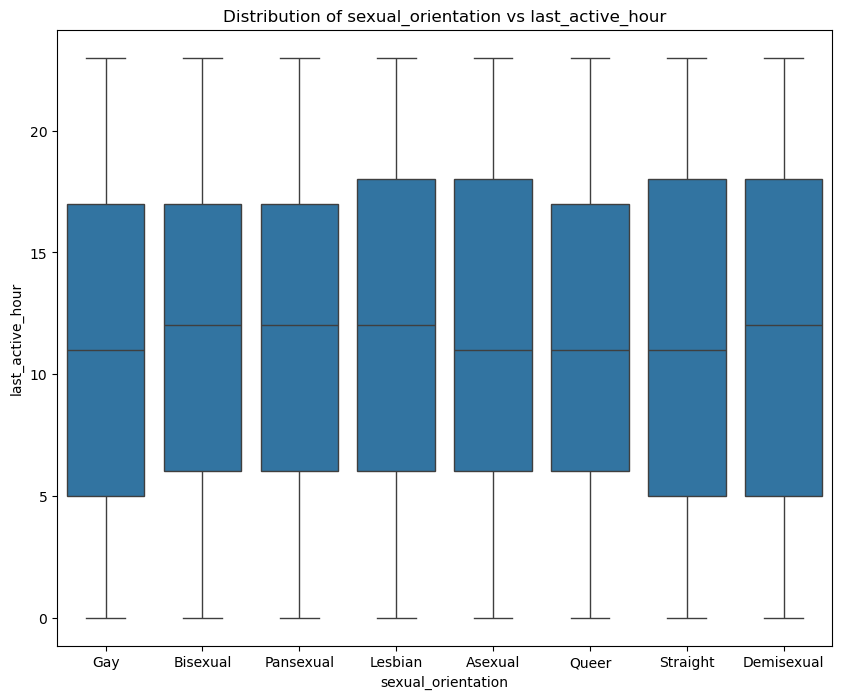

In [34]:
from src.analysis.varient_analysis import CategoricalBiVarientAnalysis

nbva = CategoricalBiVarientAnalysis('gender', 'last_active_hour')
nbva.analyse(df)
nbva = CategoricalBiVarientAnalysis('sexual_orientation', 'last_active_hour')
nbva.analyse(df)

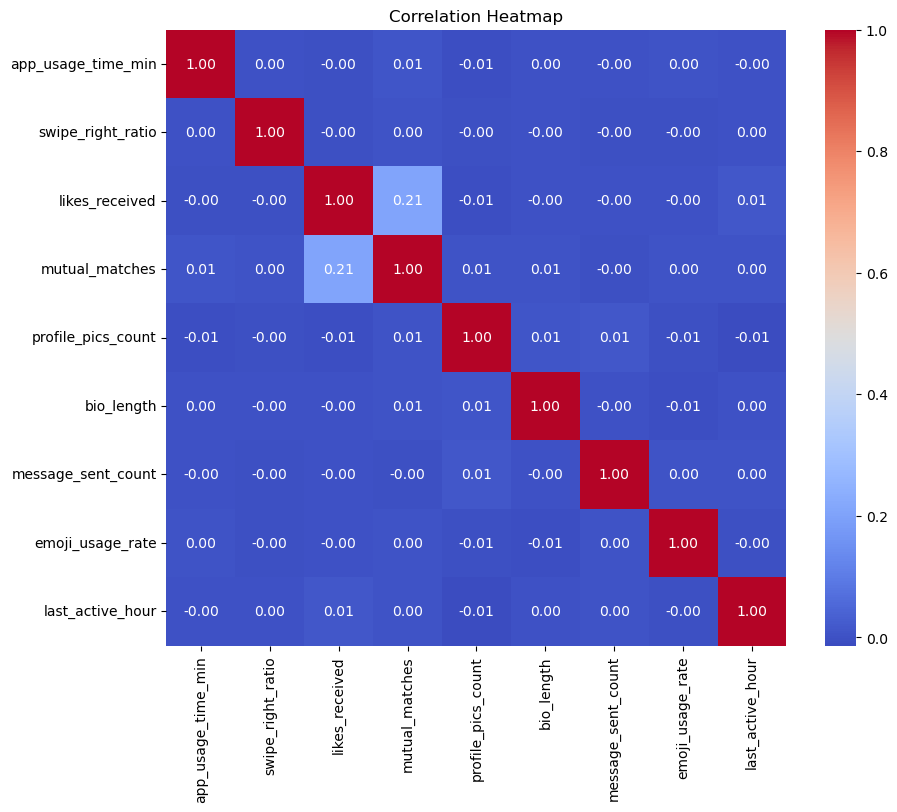

<Figure size 1000x800 with 0 Axes>

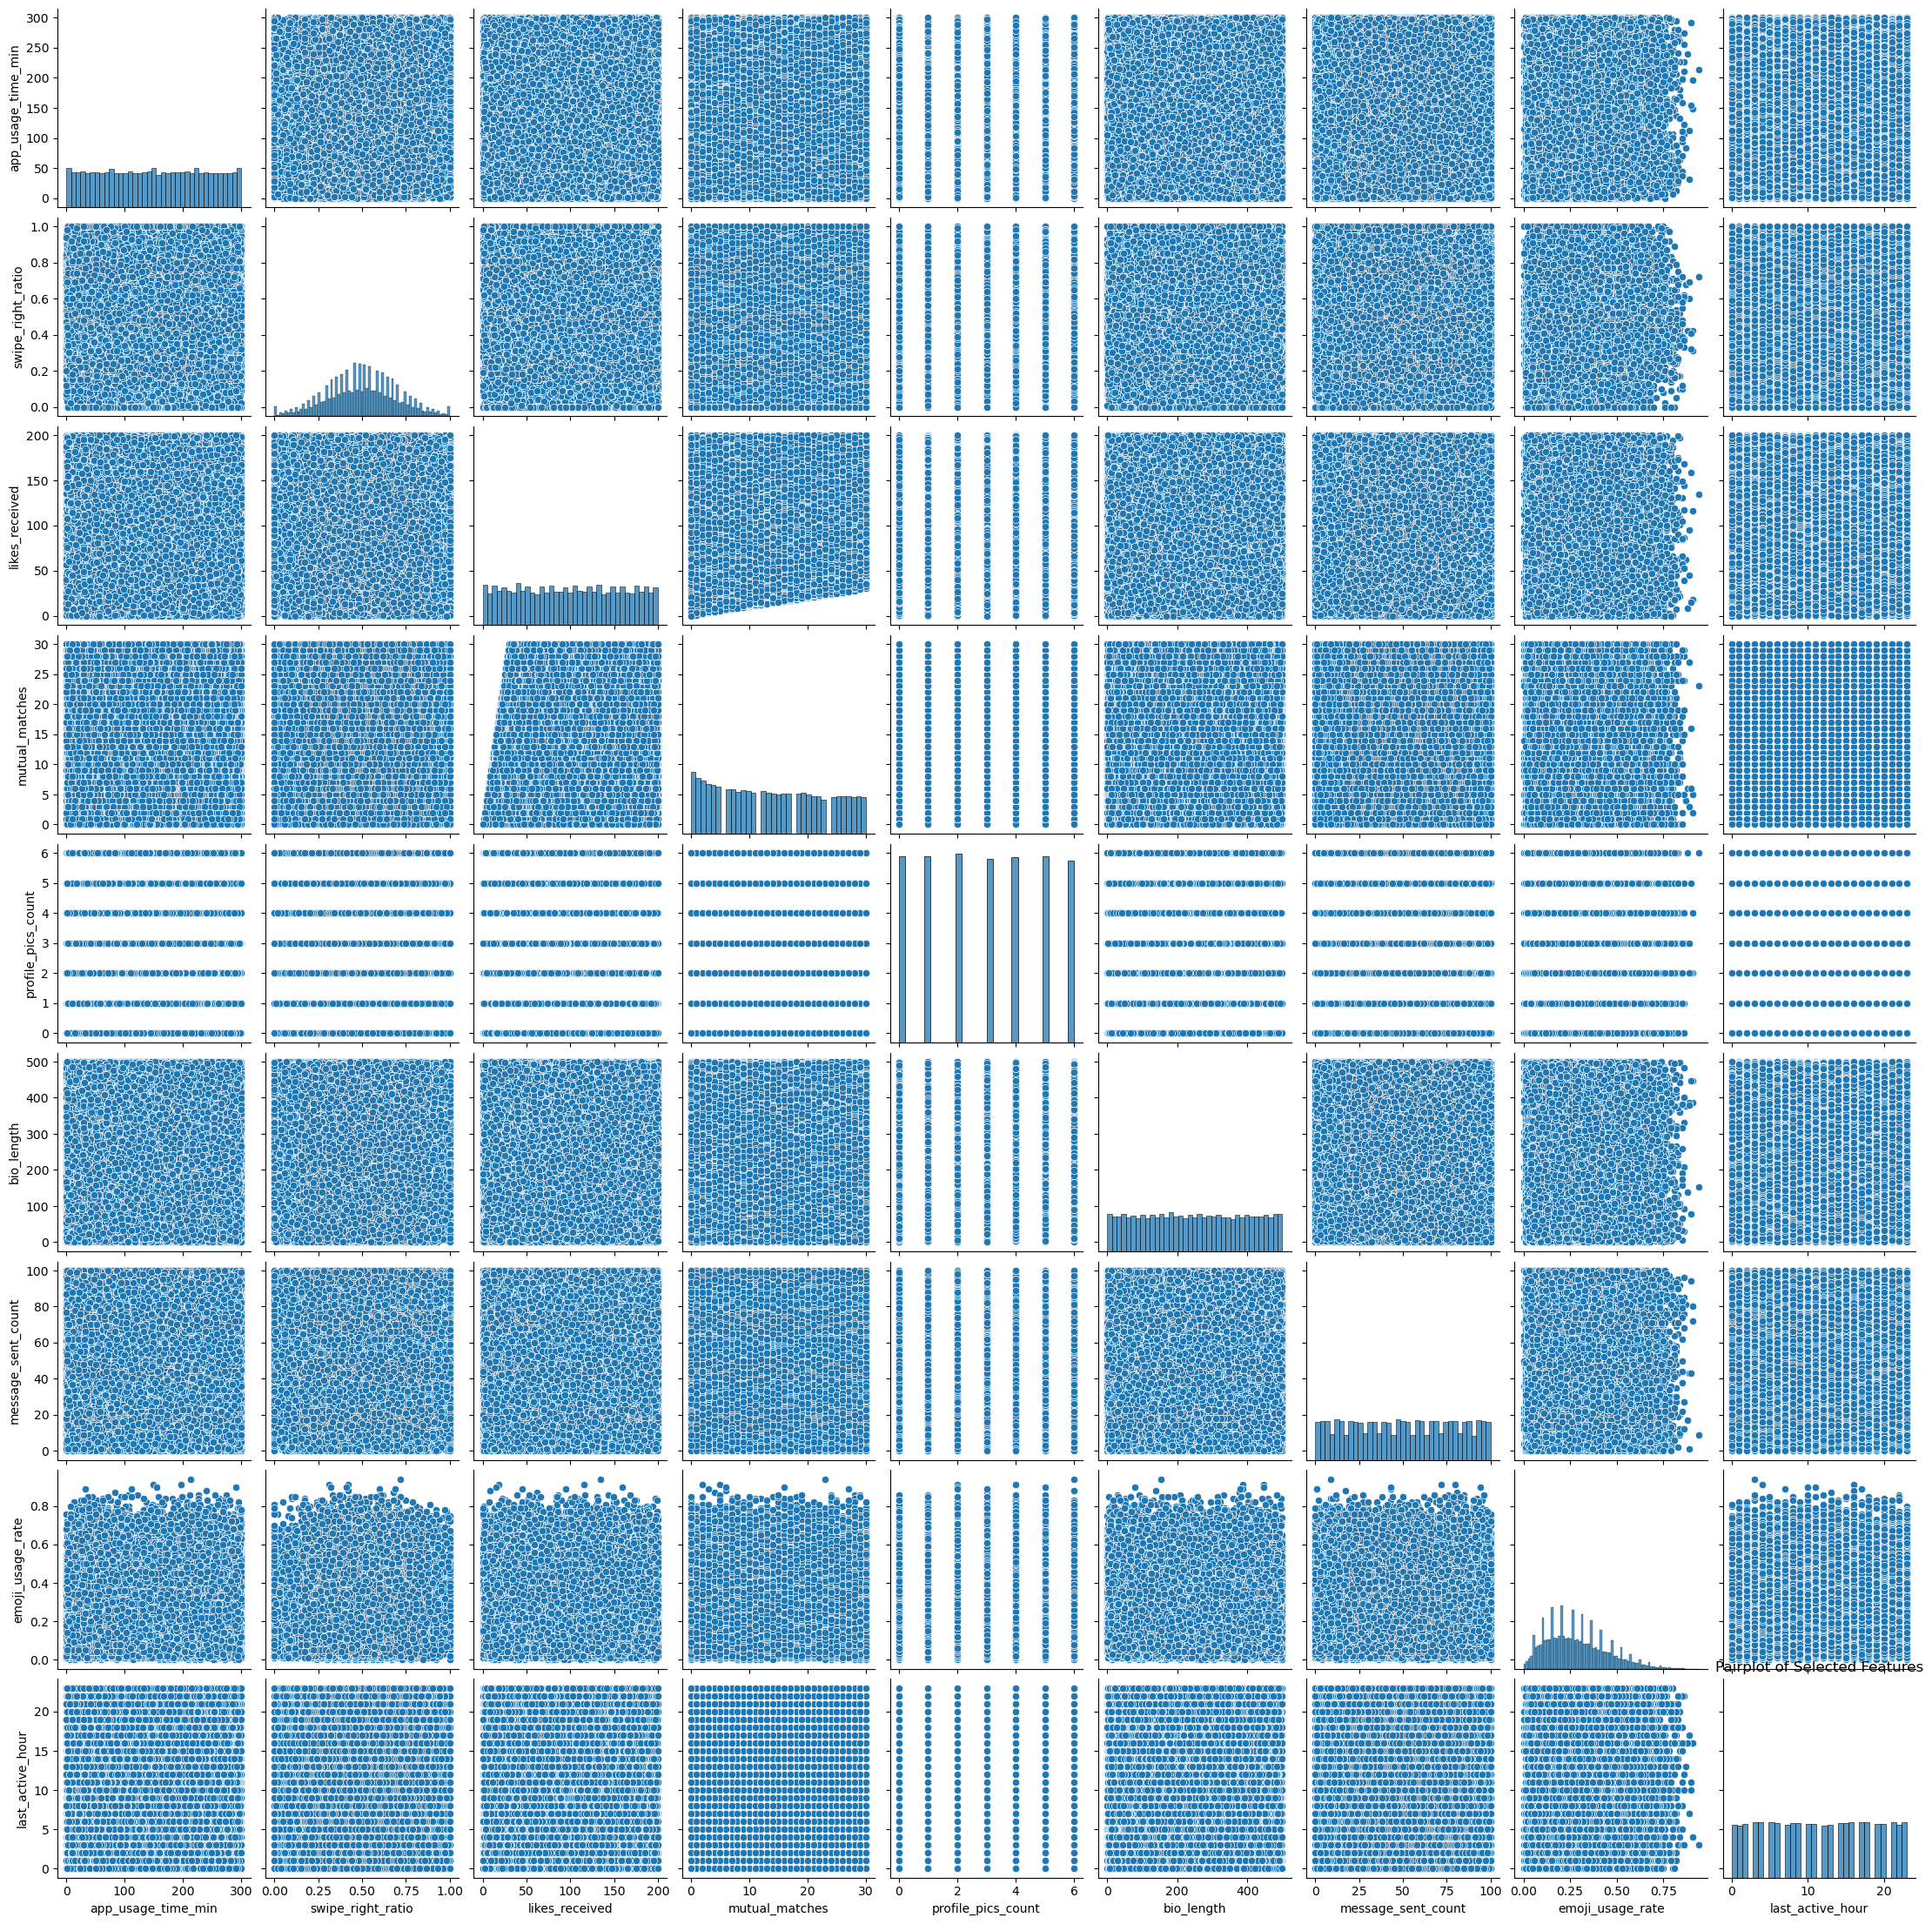

In [31]:
from src.analysis.varient_analysis import BasicMultiVarientAnalysis

nbva = BasicMultiVarientAnalysis()
nbva.analyse(df)